In [ ]:
import chardet
import pandas as pd
with open("/content/drive/MyDrive/spam.csv", "rb") as f:
    encoding = chardet.detect(f.read())["encoding"]

df = pd.read_csv("/content/drive/MyDrive/spam.csv", encoding=encoding)
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [ ]:
# Specify the columns to delete (replace with the actual column names you want to remove)
columns_to_delete = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"]

# Delete the columns using drop method
df = df.drop(columns_to_delete, axis=1)

In [ ]:
# Define a dictionary to map old column names to new names
column_renaming = {"v1": "Category","v2":"Message"}

# Rename columns using rename method
df = df.rename(columns=column_renaming)

df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
df.describe()

,Category,Message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

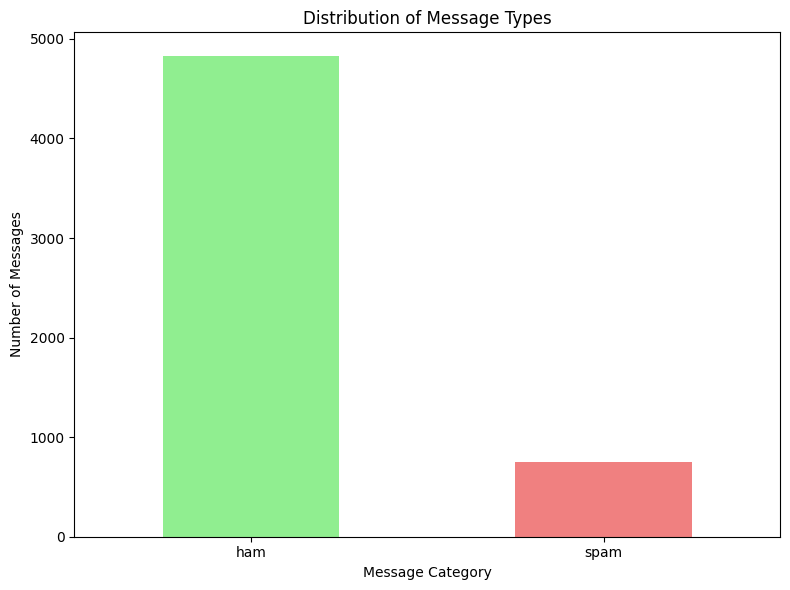

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Count the number of ham and spam messages
message_counts = df['Category'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 6))
message_counts.plot(kind='bar', color=['lightgreen', 'lightcoral'])
plt.title("Distribution of Message Types")
plt.xlabel("Message Category")
plt.ylabel("Number of Messages")
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
vectorizer = CountVectorizer()
features = vectorizer.fit_transform(df['Message'])

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, df['Category'], test_size=0.2, random_state=42)


In [ ]:
# Training the Logistic Regression model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

In [ ]:
# Evaluating model performance (accuracy)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



Accuracy: 0.97847533632287


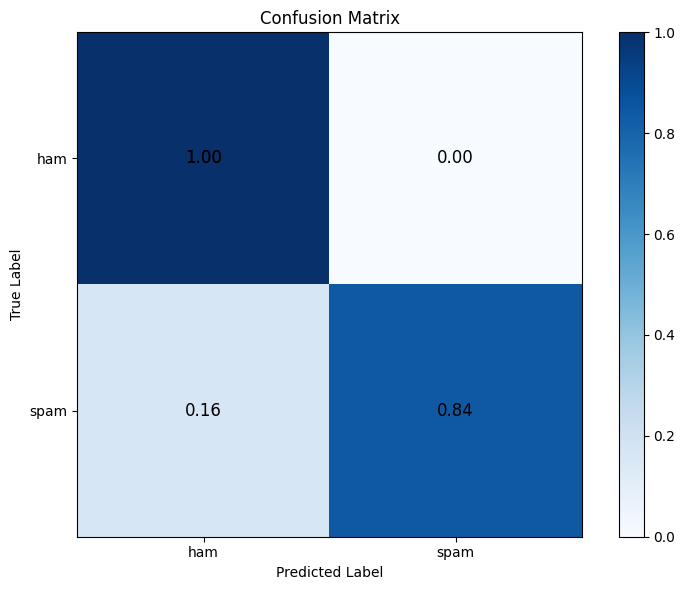

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have the trained model, predicted labels (y_predicted), and actual labels (y_test) from the previous code

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Normalize the confusion matrix (optional)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Create a visualization
plt.figure(figsize=(8, 6))
plt.imshow(cm_normalized, cmap='Blues')
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.xticks(np.arange(len(model.classes_)), model.classes_)  # Display class labels on x-axis
plt.yticks(np.arange(len(model.classes_)), model.classes_)  # Display class labels on y-axis
plt.text(0, 0, f"{cm_normalized[0, 0]:.2f}", ha='center', va='center', fontsize=12, color='black')  # Display values in cells
for i in range(len(cm_normalized)):
  for j in range(len(cm_normalized[0])):
    plt.text(j, i, f"{cm_normalized[i, j]:.2f}", ha='center', va='center', fontsize=12, color='black')
plt.colorbar()
plt.tight_layout()
plt.show()


In [ ]:
# You can now use the trained model to predict labels for new messages
new_message = "This is the 2nd time we have tried 2 contact "
new_message_features = vectorizer.transform([new_message])
prediction = model.predict(new_message_features)
print("Predicted label for new message:", prediction[0])

Predicted label for new message: ham
